In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

plt.rcParams['figure.facecolor']='white'

In [3]:
X = np.linspace(-4, 4, 1000).reshape(-1,1)

In [4]:
y = np.squeeze(X * np.sin(X) * np.cos(X))

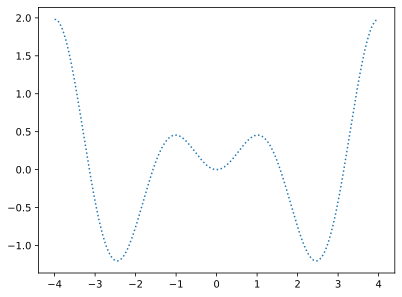

In [5]:
plt.plot(X, y, linestyle="dotted")

In [32]:
def plot_kernel(ax, regressor, X, y, X_train=None, y_train=None, noise_std=None):
    
    ax.plot(X, y, linestyle="dotted")
    
    
    if X_train is not None:
        if noise_std is None:
            ax.scatter(X_train, y_train)
        else:
            ax.errorbar(X_train, y_train, noise_std, linestyle="None", marker=".", markersize="10", color="tab:blue")
    
    mean_prediction, std_prediction = regressor.predict(X, return_std=True)
    
    ax.plot(X, mean_prediction)
    ax.fill_between(
        X.ravel(),
        mean_prediction - 1.96 * std_prediction,
        mean_prediction + 1.96 * std_prediction,
        alpha=0.25,
        color="orange"
    )
    # plt.show()

def regression(training_size=6, noise_std=None):
        
    
    # Define kernel
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
    
    if noise_std is not None:
        regressor = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
    else:
        regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    
    fig, axes = plt.subplots(1, 2, sharey="row", figsize=(12, 5))
    
    plt.tight_layout()
    
    # Before fitting
    plot_kernel(axes[0], regressor, X, y, noise_std)
    
    
    # Select training set
    training_indices = np.random.choice(np.arange(y.size), size=training_size, replace=False)
    X_train, y_train = X[training_indices], y[training_indices]
    
    if noise_std is not None:
        y_train = y_train + np.random.normal(loc=0.0, scale=noise_std, size=y_train.size)
    
    regressor.fit(X_train, y_train)
    
    # After fitting
    plot_kernel(axes[1], regressor, X, y, X_train, y_train, noise_std)
    

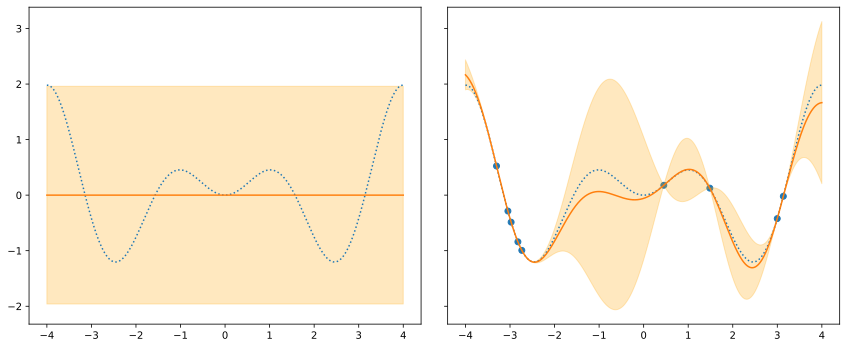

In [29]:
regression(training_size=9)

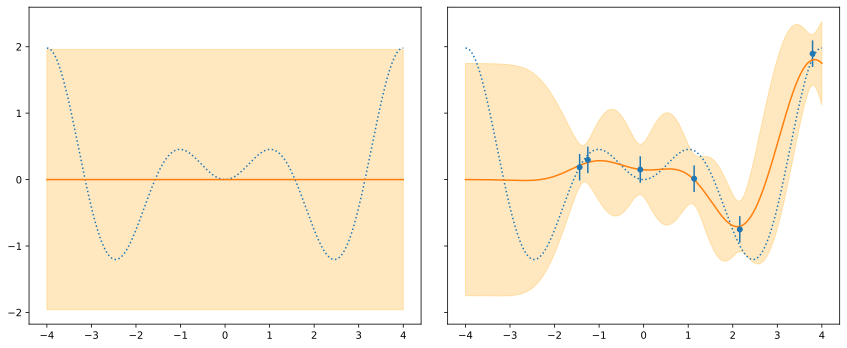

In [36]:
regression(noise_std=0.2)